# Test statičnega merilnega sistema #

In [4]:
import lvm_read
import numpy  as np
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams.update({'text.usetex': True,
                     'font.size': 31,
                     'font.family':'lmodern',})

In [5]:
class MeritevStatike():
    ''' Take a .lvm file for analysis of ROC. '''
    def __init__(self, read_data):
        self.data = lvm_read.read(read_data)
    
    def sig(self):
        '''Returns signal[0] and signal length[1] of class Meritev.'''
        sig = self.data[0]['data'][:,0]
        N = len(sig)
        return sig, N

    def time(self):
        '''Returns dt[0], fs[1] and total time[2] of class Meritev.'''
        sig = self.data[0]['data'][:,0]
        N = len(sig)
        dt = self.data[0]['Delta_X'][0]
        fs = 1 / dt
        cajt = dt * np.arange(N)
        return dt, fs, cajt
    
    def instruments(self):
        '''
        Returns instrument data of measurment Class:
        0 - Sila
        1 - Pomik
        '''
        # Temperatura
        force = self.data[0]['data'][:,0]
        # Tok
        displacement = self.data[0]['data'][:,1]
        
        return force, displacement

In [3]:
data = MeritevStatike('test.lvm')

## Togost z maso ##

In [15]:
pomik_meritev = -(np.array([45,43,40,37])-45) #mm
sila_teze = np.array([0,275,727,1018])*10**-3*9.81 #N

## Togost it silomere in laserja ##

In [12]:
shift = 0.0 #mm
pomik_laser = -data.instruments()[1][::20]-shift #mm
sila_silomer = data.instruments()[0][::20] #N

## Izris ##

No handles with labels found to put in legend.


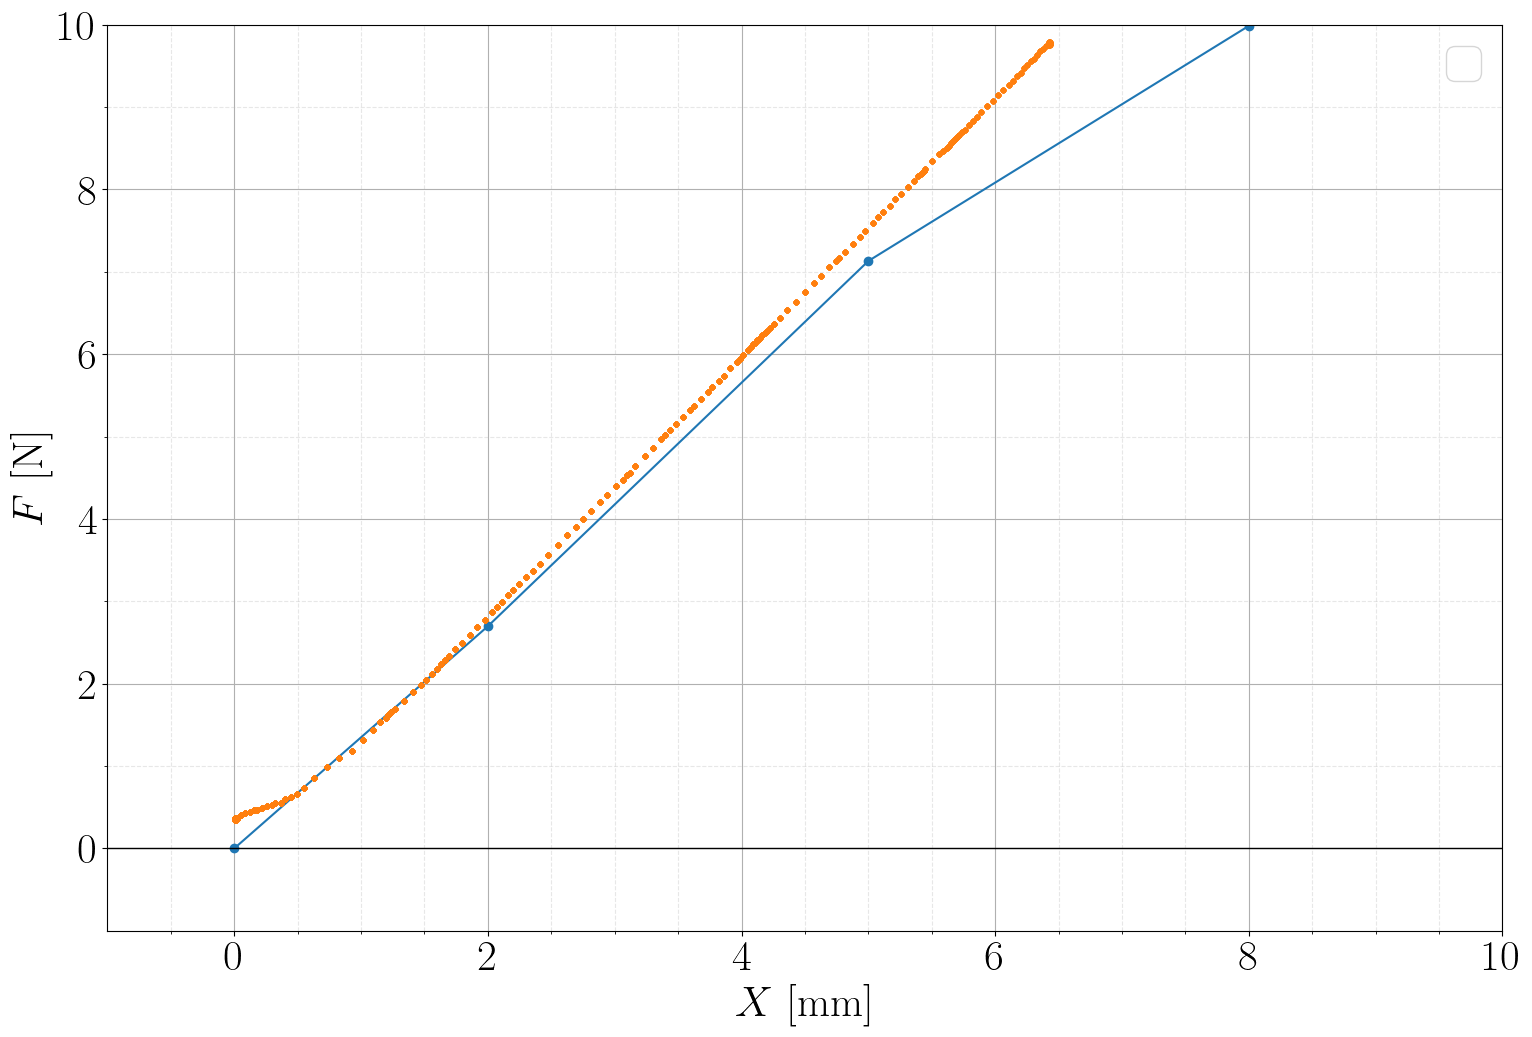

In [16]:
plt.rcParams['figure.figsize'] = [18, 12]

# sila teže
plt.plot(pomik_meritev, sila_teze, 'o-')
plt.plot(pomik_laser, sila_silomer, '.')

plt.xlabel(r'$X$ [mm]')
plt.ylabel(r'$F$ [N]')
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid()
plt.grid(which='minor', linestyle = '--', alpha=0.3)
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.show()